In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Manual Linear Regression

In [24]:
weight = np.array([2,4,5,3,6,5,7])
price = np.array([35,60,20,50,50,55,60])

In [25]:
mean_weight = np.mean(weight)
mean_weight

4.571428571428571

In [26]:
mean_price = np.mean(price)
mean_price

47.142857142857146

In [27]:
slope_m = np.sum((weight-mean_weight) * (price-mean_price)) / np.sum((weight - mean_weight)**2)
slope_m

2.620967741935484

In [28]:
intercept_c = mean_price - slope_m * mean_weight
intercept_c

35.16129032258065

In [29]:
predicted_y = slope_m*6 + intercept_c
predicted_y

50.88709677419355

In [35]:
def predicted_values(weights, slope_m, intercept_c):
    predicted_value = []
    for w in weights:
        predicted_value.append(slope_m * w + intercept_c)
    return predicted_value
predicted_value = predicted_values(weight, slope_m, intercept_c)

In [37]:
df = pd.DataFrame({'Weight': weight, 'Predicted Value': predicted_value})
df

,Weight,Predicted Value
0,2,40.403226
1,4,45.645161
2,5,48.266129
3,3,43.024194
4,6,50.887097
5,5,48.266129
6,7,53.508065


In [38]:
residuals = price - predicted_value
residuals

array([ -5.40322581,  14.35483871, -28.26612903,   6.97580645,
        -0.88709677,   6.73387097,   6.49193548])

In [40]:
df = pd.DataFrame({'Weight': weight, 'Actual Price': price, 'Predicted Price': predicted_value, 'Residuals': residuals})
df

,Weight,Actual Price,Predicted Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [43]:
# mean absolute error 
n = len(weight)
mae = (1/n)*np.sum((price - np.mean(predicted_value)))
print('The value of MAE = ', mae)

The value of MAE =  -3.045183153257572e-15


In [44]:
# mean square value 
mse = (1/n)*np.sum((price - np.mean(predicted_value))**2)
print('The value of MSE =' , mse)

The value of MSE = 184.6938775510204


In [46]:
# root mean square 
import math
rmse = math.sqrt(mse)
print('The value of RMSE =', rmse)

The value of RMSE = 13.59021256460032


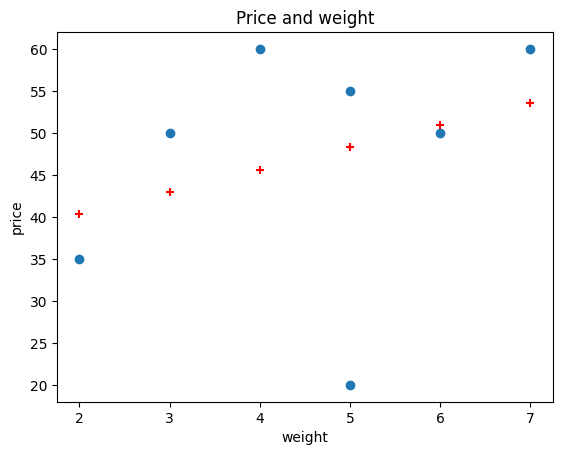

In [47]:
# plot a scratter 
plt.title("Price and weight")
plt.scatter(weight,price)
plt.xlabel("weight")
plt.ylabel("price")
# plot with predicted value 
plt.scatter(weight,predicted_value, color='red', marker='+')

### Linear regression unsing sklearn model

In [52]:
# read a data set
df = pd.read_excel('price.xlsx')
df.head(2)

,weight,price
0,2,35
1,4,60


In [53]:
x = df[['weight']]
y = df [['price']]

In [54]:
from sklearn.linear_model import LinearRegression
# create an object of regression
reg = LinearRegression()

In [55]:
reg.fit(x,y)

LinearRegression()

In [59]:
reg_slope_m = reg.coef_
reg_slope_m

array([[2.62096774]])

In [60]:
reg_intercept = reg.intercept_
reg_intercept

array([35.16129032])

In [61]:
reg.predict([[6]])

c:\Users\mahen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [62]:
pred = reg.predict(x)

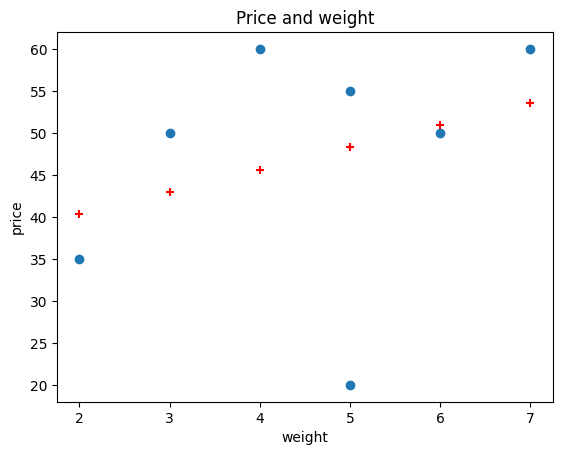

In [66]:
# plot values
plt.title("Price and weight")
plt.scatter(x, y)
plt.xlabel("weight")
plt.ylabel("price")
# plot with predicted value 
plt.scatter(x,pred, color='red', marker='+')

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
mse = mean_squared_error(y,pred)
mse

167.30990783410135

In [69]:
mae = mean_absolute_error(y,pred)
mae

9.87327188940092

In [70]:
import math
math.sqrt(mse)

12.934833119685052